## Multi-Step Stacked Stateful LSTM to Predict Sum of Sine and Cosine Functions

This notebook demonstrates how to implement LSTM model in Keras when there are multiple inputs and predict multi-steps ahead. Here, LSTM model the sum of sine and cosine functions and compare with predictions and original values.

#### Generating 'sine' values

In [2]:
import numpy as np

step_size = (20*np.pi/1000)
points = np.arange(1000) #returns evenly space points b/w 0 and 1000
points = step_size*points  #now distance b/w two points is 20*np.pi/1000
sin_dataset = np.sin(points)[:,None] #creates sine values at generated points
cos_dataset = np.cos(points)[:,None] #creates cosine values at generated points
sum_dataset = np.sin(points)[:,None] + np.sin(points)[:,None]#creates tan values at generated points

print sin_dataset.shape
print cos_dataset.shape

(1000, 1)
(1000, 1)


#### Plotting the generated sine values

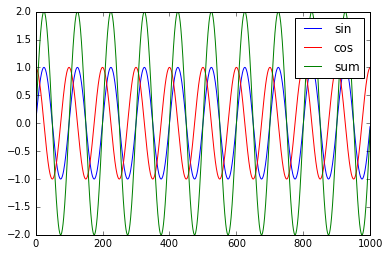

In [59]:
import matplotlib.pyplot as plt
import pylab
pylab.plot(sin_dataset, 'blue', label='sin')
pylab.plot(cos_dataset, 'red', label ='cos')
pylab.plot(sum_dataset, 'green', label ='sum')
pylab.legend()
pylab.show()

#### Combine sin and cos datasets into a single dataset

In [4]:
dataset = []
for i in range(1000):
    sin = sin_dataset[i, 0]
    cos = cos_dataset[i, 0]
    sum = sin + cos
    dataset.append([sin, cos, sum])
dataset = np.array(dataset)    
print 'Shape of the dataset =', dataset.shape
print 'First 4 data points of the dataset'
print dataset[0:4]

Shape of the dataset = (1000, 3)
First 4 data points of the dataset
[[0.         1.         1.        ]
 [0.06279052 0.99802673 1.06081725]
 [0.12533323 0.9921147  1.11744793]
 [0.18738131 0.98228725 1.16966857]]


#### Splitting the dataset into train and test datasets

In [5]:
train_size = int(len(dataset)*0.67)
test_size   = len(dataset) - train_size

train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

print train.shape
print test.shape

(670, 3)
(330, 3)


#### Function - Generate X and Y for the LSTM

In [23]:
def create_dataset(dataset, look_back=1, look_ahead=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-look_ahead):
        dataX.append(dataset[i:(i+look_back)])
        y = []
        for j in range(look_ahead):
            y.append(dataset[i+j+look_back, 2])
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

#### Window of 'look_back' time steps

In [26]:
look_back = 10
look_ahead = 10

trainX, trainY = create_dataset(train, look_back, look_ahead)
testX, testY   = create_dataset(test, look_back, look_ahead)

print 'trainX shape =', trainX.shape
print 'trainY shape =', trainY.shape
print 'testX shape  =', testX.shape
print 'testY shape  =', testY.shape

print train[0:10]

print trainX[0], '=>', trainY[0]
print
print trainX[1], '=>', trainY[1]
print
print trainX[2], '=>', trainY[2]

trainX shape = (650, 10, 3)
trainY shape = (650, 10)
testX shape  = (310, 10, 3)
testY shape  = (310, 10)
[[0.         1.         1.        ]
 [0.06279052 0.99802673 1.06081725]
 [0.12533323 0.9921147  1.11744793]
 [0.18738131 0.98228725 1.16966857]
 [0.24868989 0.96858316 1.21727305]
 [0.30901699 0.95105652 1.26007351]
 [0.36812455 0.92977649 1.29790104]
 [0.42577929 0.90482705 1.33060634]
 [0.48175367 0.87630668 1.35806035]
 [0.53582679 0.84432793 1.38015472]]
[[0.         1.         1.        ]
 [0.06279052 0.99802673 1.06081725]
 [0.12533323 0.9921147  1.11744793]
 [0.18738131 0.98228725 1.16966857]
 [0.24868989 0.96858316 1.21727305]
 [0.30901699 0.95105652 1.26007351]
 [0.36812455 0.92977649 1.29790104]
 [0.42577929 0.90482705 1.33060634]
 [0.48175367 0.87630668 1.35806035]
 [0.53582679 0.84432793 1.38015472]] => [1.39680225 1.40793723 1.41351573 1.41351573 1.40793723 1.39680225
 1.38015472 1.35806035 1.33060634 1.29790104]

[[0.06279052 0.99802673 1.06081725]
 [0.12533323 0.9921

#### Building the LSTM model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

batch_size = 1
model = Sequential()
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 3), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 3), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 3), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(look_ahead))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
for i in range(100):
    print "Epoch No = ", i
    model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=1, shuffle=False)
    model.reset_states()

Epoch No =  0
Epoch 1/1
650/650 [==============================] - 28s 43ms/step - loss: 0.3124 - acc: 0.1400
Epoch No =  1
Epoch 1/1
650/650 [==============================] - 27s 42ms/step - loss: 0.1155 - acc: 0.2892
Epoch No =  2
Epoch 1/1
650/650 [==============================] - 33s 50ms/step - loss: 0.0886 - acc: 0.4108
Epoch No =  3
Epoch 1/1
650/650 [==============================] - 32s 49ms/step - loss: 0.0669 - acc: 0.4446
Epoch No =  4
Epoch 1/1
650/650 [==============================] - 31s 47ms/step - loss: 0.0744 - acc: 0.4400
Epoch No =  5
Epoch 1/1
650/650 [==============================] - 30s 46ms/step - loss: 0.0571 - acc: 0.5308
Epoch No =  6
Epoch 1/1
650/650 [==============================] - 32s 49ms/step - loss: 0.0572 - acc: 0.5677
Epoch No =  7
Epoch 1/1
650/650 [==============================] - 29s 45ms/step - loss: 0.0539 - acc: 0.5892
Epoch No =  8
Epoch 1/1
650/650 [==============================] - 31s 47ms/step - loss: 0.0789 - acc: 0.6585
Epoch No =

650/650 [==============================] - 34s 52ms/step - loss: 0.0321 - acc: 0.8369
Epoch No =  74
Epoch 1/1
650/650 [==============================] - 33s 51ms/step - loss: 0.0320 - acc: 0.8338
Epoch No =  75
Epoch 1/1
650/650 [==============================] - 35s 53ms/step - loss: 0.0372 - acc: 0.8262
Epoch No =  76
Epoch 1/1
650/650 [==============================] - 34s 53ms/step - loss: 0.0249 - acc: 0.8569
Epoch No =  77
Epoch 1/1
650/650 [==============================] - 31s 47ms/step - loss: 0.0282 - acc: 0.8554
Epoch No =  78
Epoch 1/1
650/650 [==============================] - 32s 50ms/step - loss: 0.0396 - acc: 0.8462
Epoch No =  79
Epoch 1/1
650/650 [==============================] - 35s 54ms/step - loss: 0.0227 - acc: 0.8646
Epoch No =  80
Epoch 1/1
650/650 [==============================] - 39s 60ms/step - loss: 0.0333 - acc: 0.8185
Epoch No =  81
Epoch 1/1
650/650 [==============================] - 34s 52ms/step - loss: 0.0447 - acc: 0.8108
Epoch No =  82
Epoch 1/1
6

In [29]:
trainScore = model.evaluate(trainX, trainY, batch_size=1, verbose=1)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX, testY, batch_size=1, verbose=1)
print('Test Score: ', testScore)

650/650 [==============================] - 2s 3ms/step
('Train Score: ', [0.0036628626821066765, 0.92])
310/310 [==============================] - 1s 3ms/step
('Test Score: ', [0.003978582155756275, 0.9225806451612903])


#### Predicting 10 steps of future values for each input of the test dataset

In [102]:
size_predict = testX.shape[0]
predictions = np.zeros((size_predict, look_ahead))
for i in range(size_predict):
    prediction = model.predict(np.array([testX[i]]), batch_size=1)
    predictions[i] = prediction

#### Plotting the original and predictions for each step

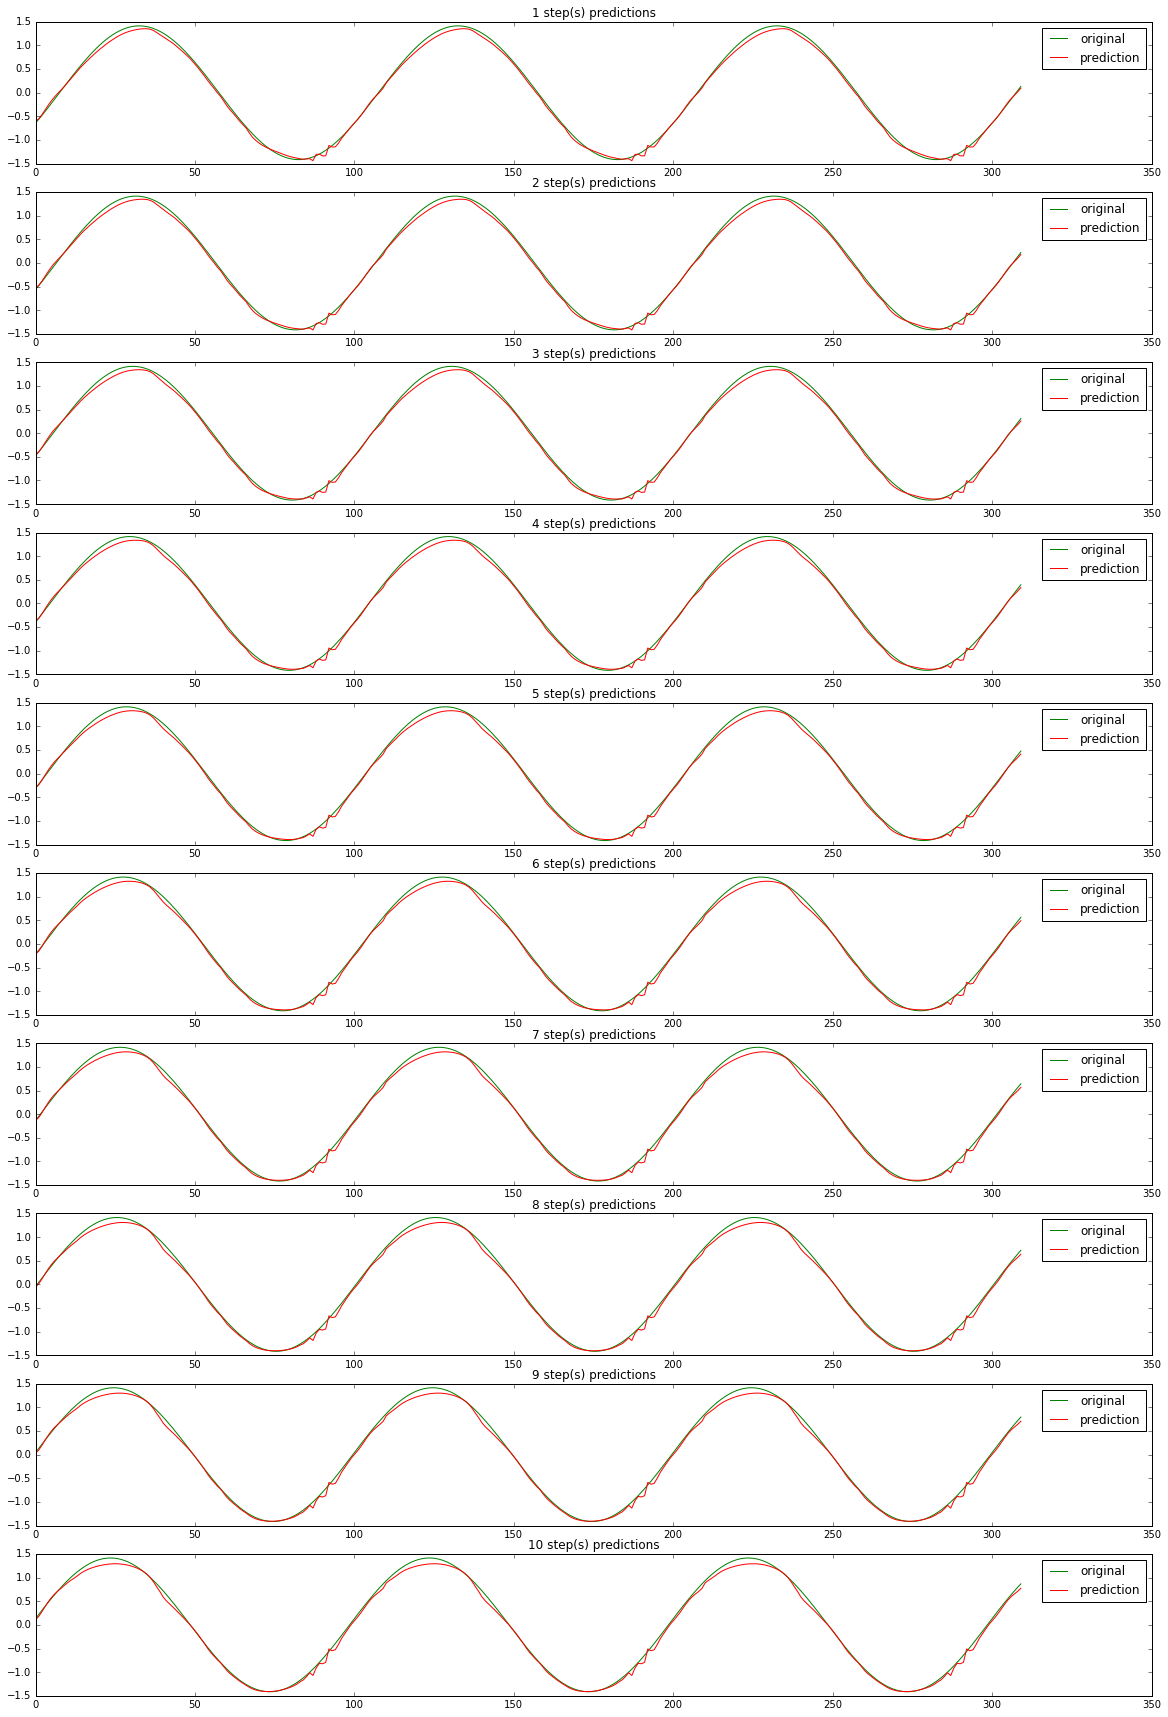

In [114]:
steps = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 1
plt.figure(figsize=(20,30))
for s in steps:
    plt.subplot(len(steps), 1, i)
    plt.plot(testY[:,s], 'g', label="original")
    plt.plot(predictions[:, s], 'r', label="prediction")
    title = str(s+1) + " step(s) predictions"
    plt.title(title)
    plt.legend()
    i += 1
plt.show()